Global Power Plant Database

Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

Importing required libraries

In [6]:
data = pd.read_csv('Global Power Plant Database(Project).csv')
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


There are two labels that need to be predicted. The first one is regression with the label capacity_mw and the second one is classification with the target variable primary fuel.

In [7]:
data.shape

(908, 25)

There are 909 rows and 25 columns.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

There are some numerical values and some categorical columns

In [9]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

There are many null values in the data

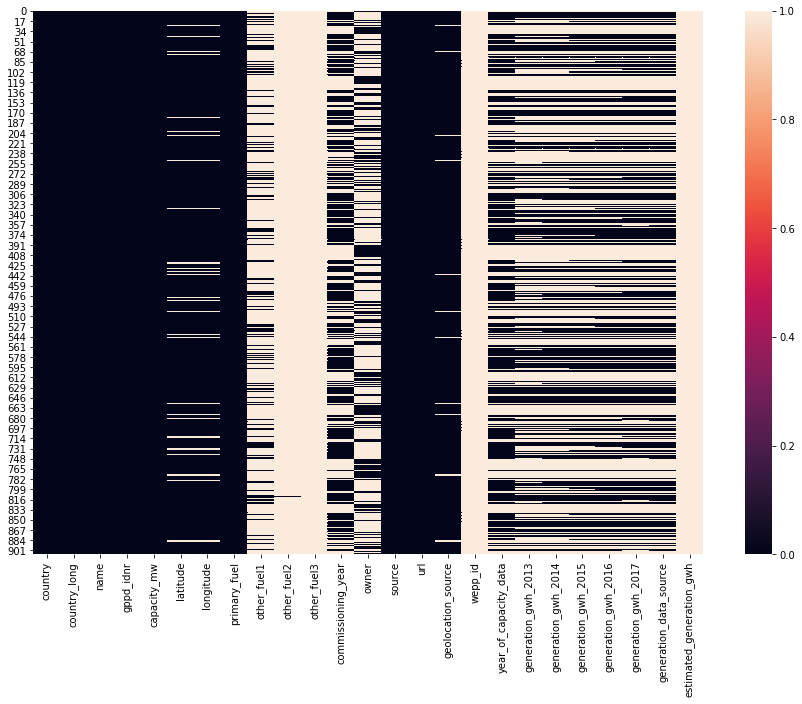

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull())
plt.show()

Visualization of the null values

In [11]:
data.drop(columns = ['other_fuel2', 'other_fuel3','wepp_id','estimated_generation_gwh'], axis = 1, inplace = True)

Dropping the columns that do not have any non-null value

In [12]:
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are many null values present in the data. The columns that contain only null values will be dropped.


In [13]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


 

1.   There is very high variation and skewnwss in data of generation_gwh for all the years.
2.   There is high skewness in capacity_mw.
3.   There is only one data in year of capacity data i.e 2018, so it is better to drop it as it is not giving any insight about the data. 


In [14]:
data.drop(columns = ['year_of_capacity_data'], inplace = True)

Dropping the year of capacity data from the dataset

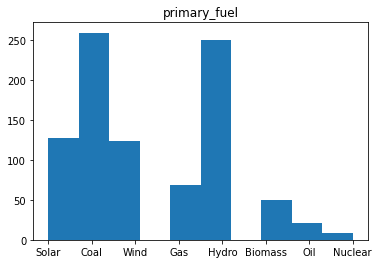

In [16]:
#HISTOGRAM

data['primary_fuel'].hist(grid = False)
plt.title('primary_fuel')
plt.show()

The representation of the column primary fuel as it is one the target variable

There is class imbalance in this data

Very high skewness in the column capacity_mw

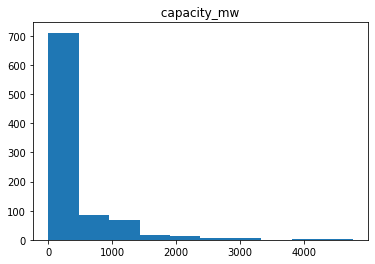

In [17]:
#HISTOGRAM

data['capacity_mw'].hist(grid = False)
plt.title(' capacity_mw ')
plt.show()

The visual representation of the capacity_mw column, there is high skewness

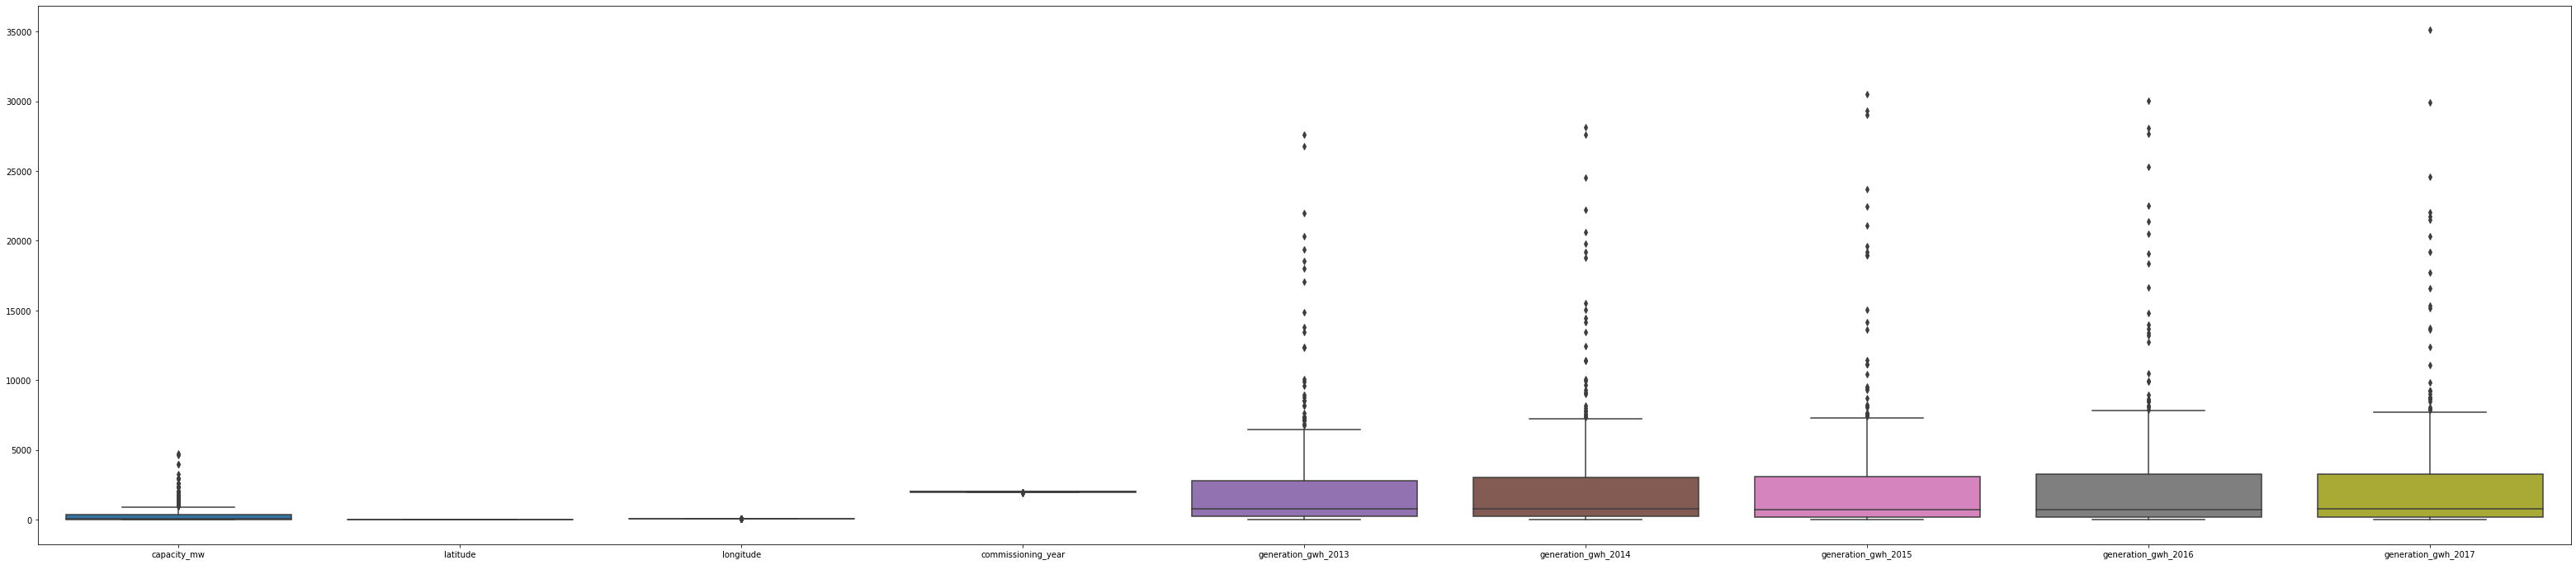

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(55, 12))
sns.boxplot(data = data, ax=ax)
plt.show()

The boxplot shows that there are many outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea4ddb19d0>,
      dtype=object)

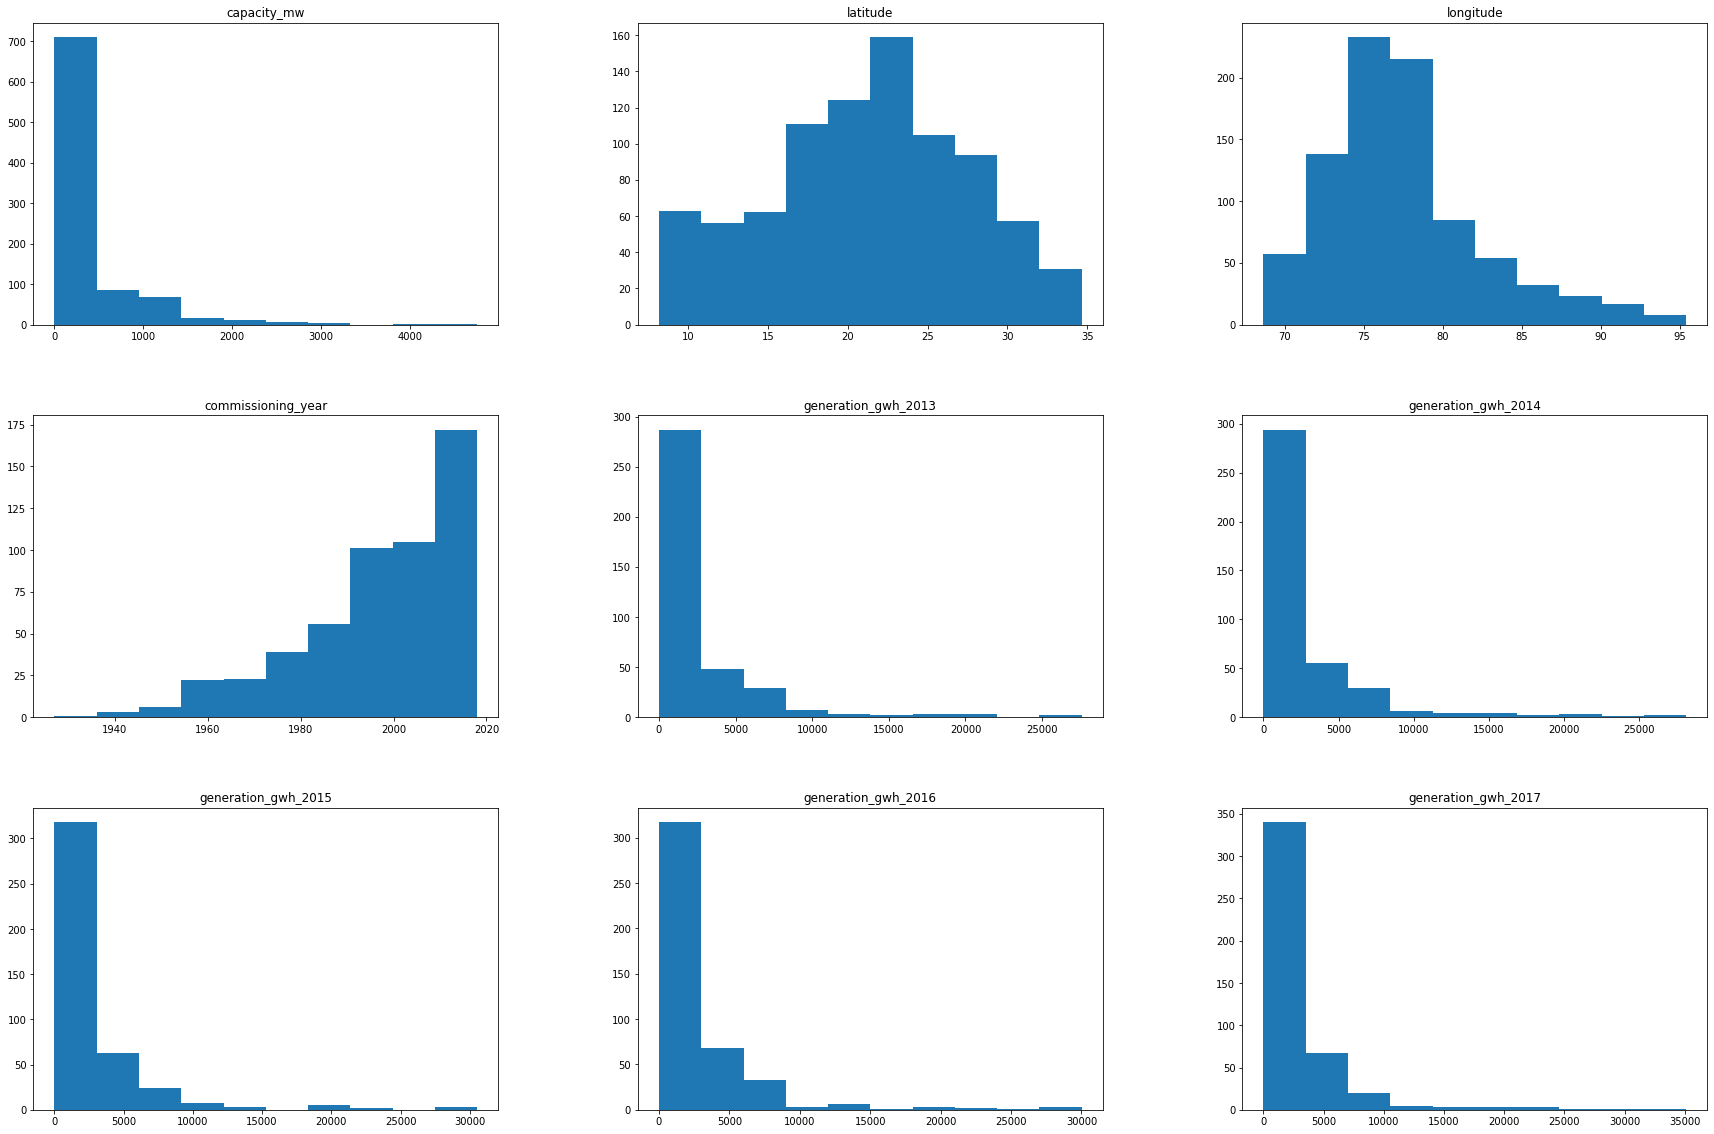

In [19]:
data.hist(figsize = (30,20), grid = False)

The data is now less skewed and more towards normal distribution.

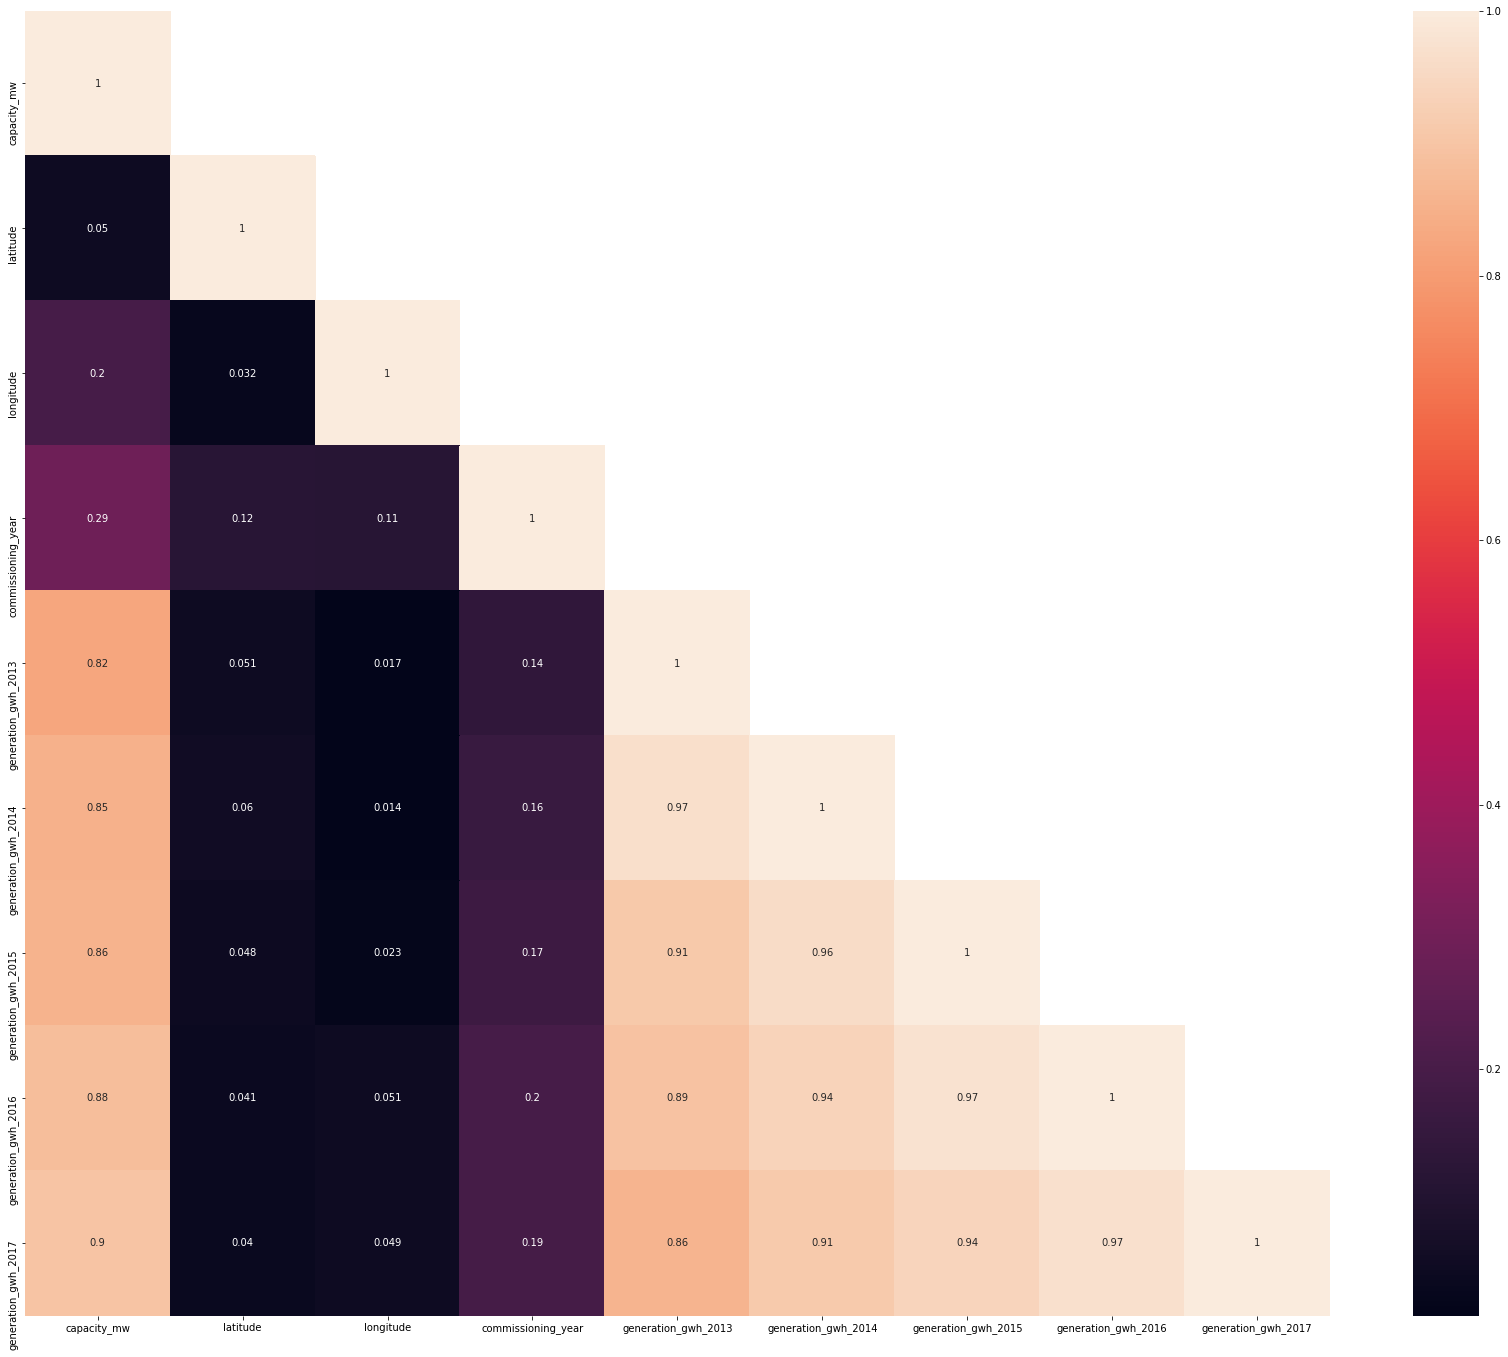

In [20]:
#Correlation Matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(30,24)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

It appears that there is high multicollinearity between certain columns.

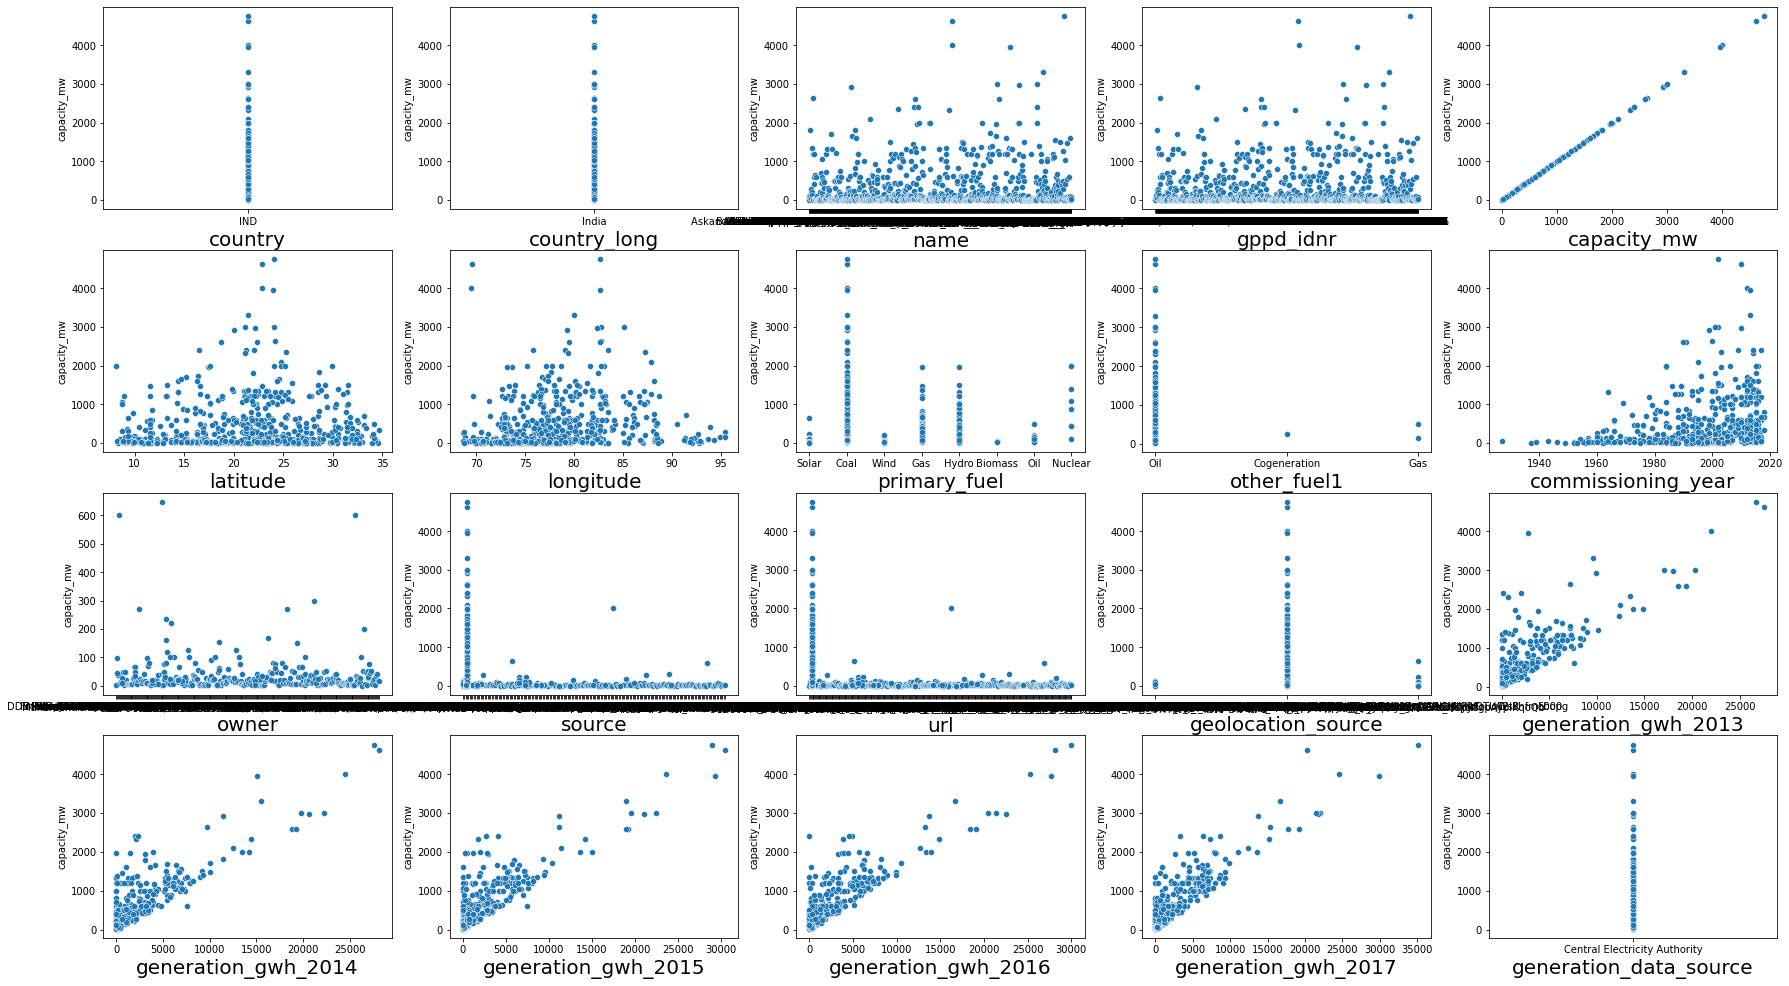

In [21]:
plt.figure(figsize = (30,35))
graph = 1

for column in data:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.scatterplot(x = data[column], y = 'capacity_mw', data = data)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

Scatter plot shows that there does not exist relationship between capacity_mw and some variables. We will drop those variables

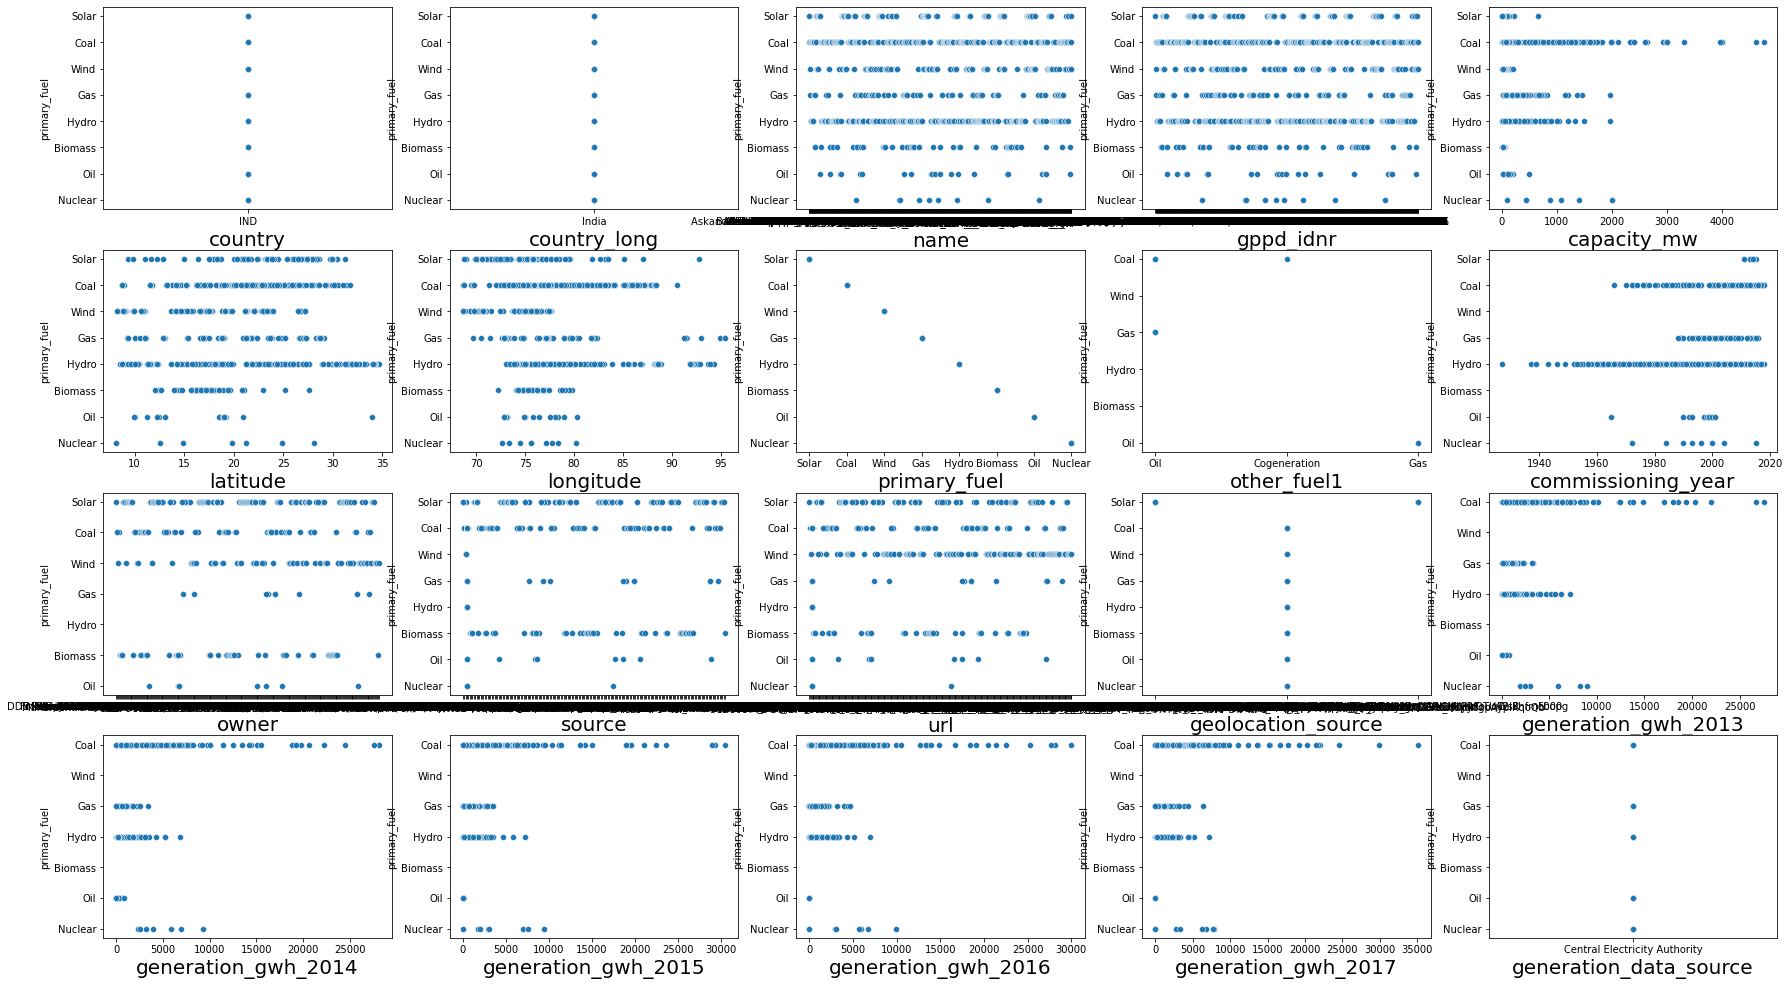

In [22]:
plt.figure(figsize = (30,35))
graph = 1

for column in data:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.scatterplot(x = data[column], y = 'primary_fuel', data = data)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

Some variable do not have any relationship with primary_fuel

In [23]:
data.skew()

capacity_mw            3.193257
latitude              -0.143622
longitude              1.100942
commissioning_year    -1.056132
generation_gwh_2013    3.416338
generation_gwh_2014    3.357683
generation_gwh_2015    3.679016
generation_gwh_2016    3.524785
generation_gwh_2017    3.576849
dtype: float64

There is high skewness in some variables

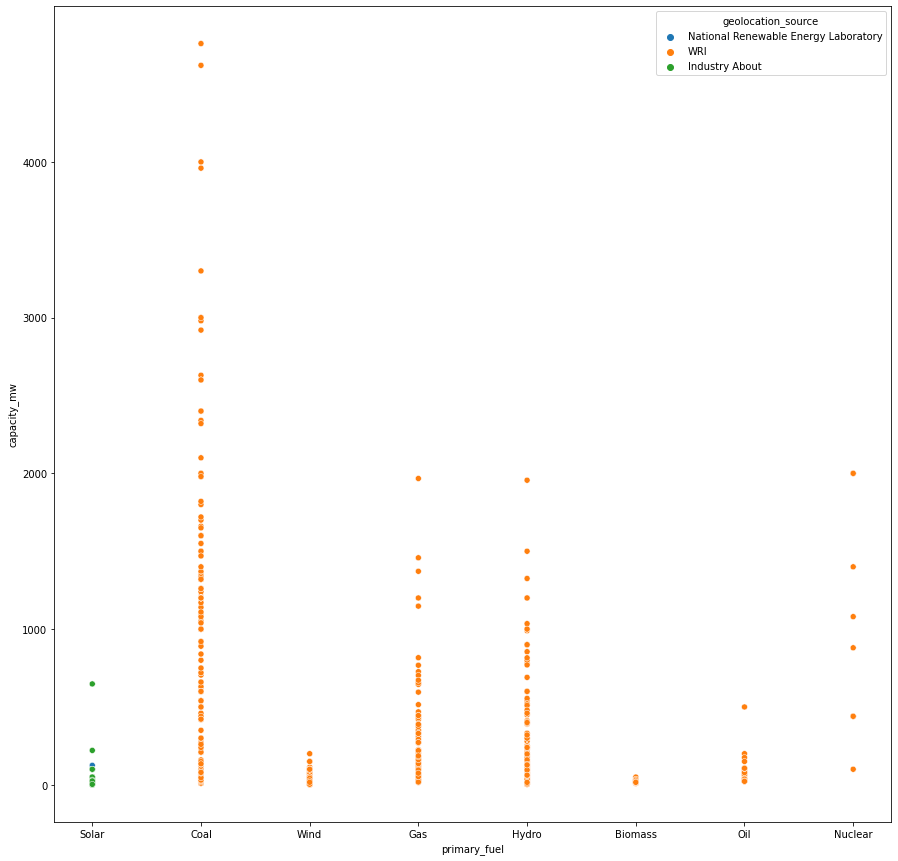

In [24]:
fig,axes=plt.subplots(1,1,figsize=(15,15))
sns.scatterplot(x='primary_fuel',y='capacity_mw',hue='geolocation_source',data=data)

The scatter plot shows the relationship between capacity_mw and primary_level

In [25]:
data['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

There is only a single entry in generation_data_source. It will not help in prediction, so it is better to drop it.

In [26]:
data.drop(columns = ['generation_data_source'], axis = 1, inplace = True)

Dropped the column

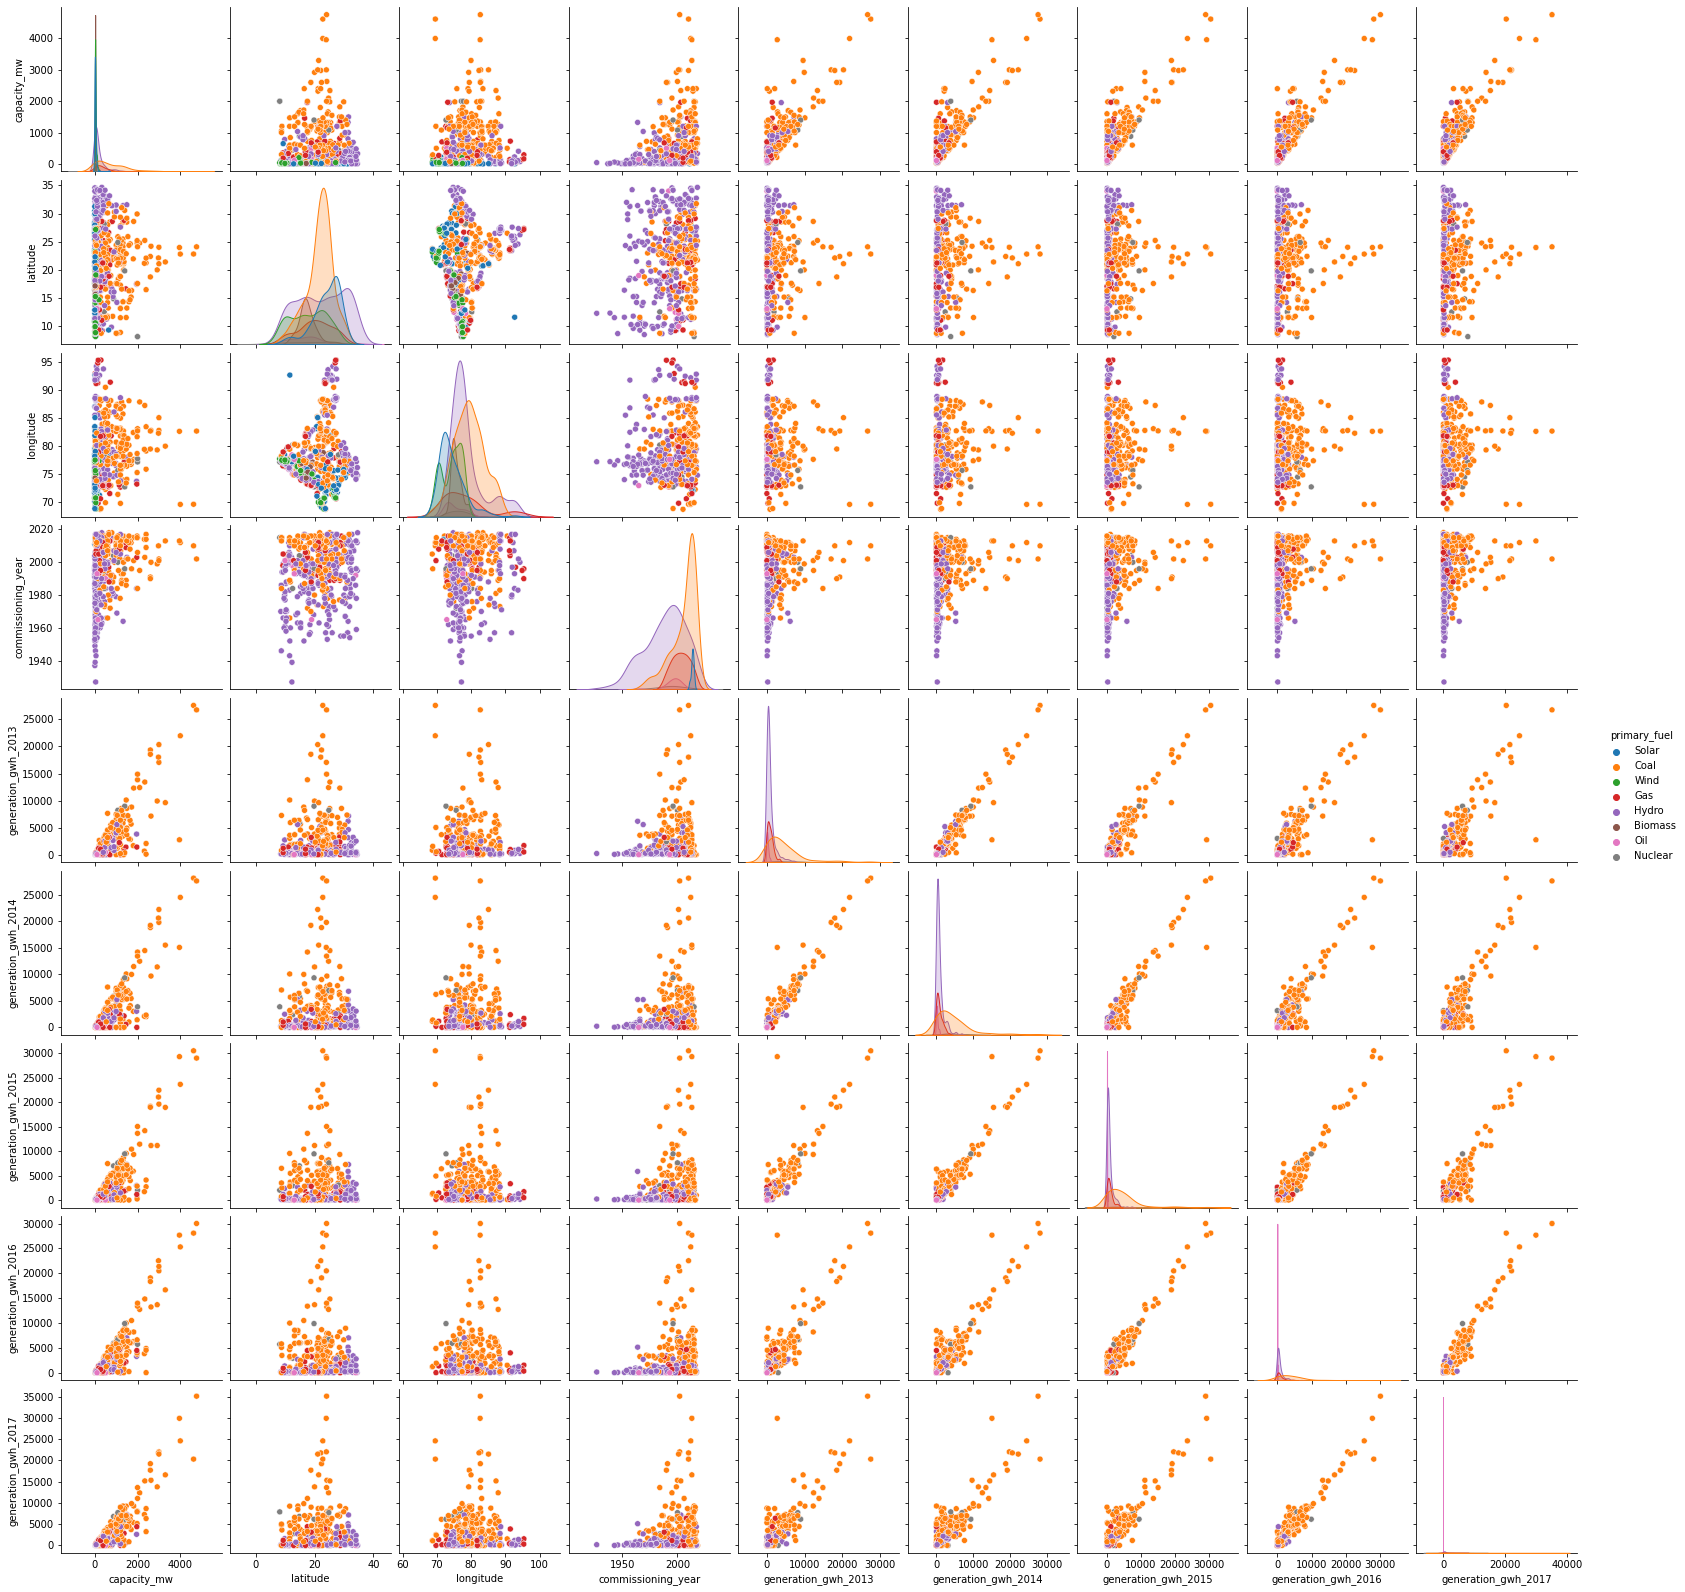

In [27]:
sns.pairplot(data, hue = 'primary_fuel')

Pairplot shows that coal is associated with the high capacity.

In [28]:
#Dealing with null values

from sklearn.impute import KNNImputer
knn_ipm = KNNImputer(n_neighbors = 3)
data_filled = knn_ipm.fit_transform(data[['latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017']])

data1 = pd.DataFrame(data_filled)

                                                                      

Dealt with null values using KNNImputer

In [29]:
data1.columns = ['latitude', 'longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
data1

,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,73.2407,2011.000000,573.288667,576.547333,482.349333,551.226333,529.008000
1,24.7663,74.6090,1967.000000,3040.819933,2531.734217,298.881417,265.260367,241.997267
2,21.9038,69.3732,2009.333333,1941.346333,2420.079333,1942.164800,2280.040517,1644.988333
3,23.8712,91.3602,2004.000000,631.777928,617.789264,843.747000,886.004428,663.774500
4,21.9603,82.4091,2015.000000,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,2016.000000,193.563333,81.211333,0.994875,233.596650,865.400000
904,12.8932,78.1654,1977.666667,259.705351,221.352445,125.761164,41.617533,1685.693383
905,15.2758,75.5811,1961.333333,169.614333,96.796917,63.411350,37.395417,61.474417
906,24.3500,73.7477,1991.333333,781.667033,1143.319383,965.062900,828.058550,1281.792517


Rename the columns

In [30]:
data['other_fuel1'] = data['other_fuel1'].fillna(data['other_fuel1'].mode()[0])
data['owner'] = data['owner'].fillna(data['owner'].mode()[0])
data['geolocation_source'] = data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])
data['commissioning_year'] = data1['commissioning_year']
data['generation_gwh_2013'] = data1['generation_gwh_2013']
data['generation_gwh_2014'] = data1['generation_gwh_2014']
data['generation_gwh_2015'] = data1['generation_gwh_2015']
data['generation_gwh_2016'] = data1['generation_gwh_2016']
data['generation_gwh_2017'] = data1['generation_gwh_2017']
data['latitude'] = data1['latitude']
data['longitude'] = data1['longitude']
data.isna().sum()

country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
source                 0
url                    0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

Dealing with null values of the categorical columns

In [32]:
data['country'].value_counts()

IND    908
Name: country, dtype: int64

There is a single country, so it is better to drop it

In [33]:
data['country_long'].value_counts()


India    908
Name: country_long, dtype: int64

There is a single country long, so it is better to drop it

In [34]:
data['name'].value_counts()

PANNIAR                     1
KYREDEMKULAI                1
Powerica Jangi Vandjiya     1
KOLHAPUR KAGAL              1
Mulshi Solar Power Plant    1
                           ..
NAGARJUNA SAGAR             1
KUNDAH I-V                  1
BALIMELA                    1
UMIAM I II &IV              1
BANSAGAR (I)                1
Name: name, Length: 908, dtype: int64

There are different names for each row, so it is better to drop it

In [35]:
data['gppd_idnr'].value_counts()


IND0000278    1
WRI1026071    1
WRI1019951    1
WRI1026215    1
IND0000536    1
             ..
IND0000122    1
IND0000421    1
IND0000026    1
IND0000403    1
IND0000166    1
Name: gppd_idnr, Length: 908, dtype: int64

There are different gppd_idnr for each row, so it is better to drop it

In [37]:
data.drop(columns = ['gppd_idnr','name', 'country_long','country'], axis = 1, inplace = True)

dropped the columns

In [38]:
#Treating the outliers

# findingout the quantile of data with continuous columns
col = data.drop(columns = ['primary_fuel','other_fuel1','owner','source','url','geolocation_source'])
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
data_new = col[~((col < (Q1 -  1.5*IQR)) |(col > (Q3 +  1.5*IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", col.shape)
print("shape after".ljust(20),":", data_new.shape)
print("Percentage Loss".ljust(20),":", (col.shape[0]-data_new.shape[0])/col.shape[0])

shape before and after
shape before         : (908, 9)
shape after          : (703, 9)
Percentage Loss      : 0.22577092511013216


We can't apply this method, as we are losing 22% data

In [41]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

Applies label encoder

In [42]:
a = lab_enc.fit_transform(data['primary_fuel'])
b = lab_enc.fit_transform(data['other_fuel1'])
c = lab_enc.fit_transform(data['owner'])
d = lab_enc.fit_transform(data['source'])
e = lab_enc.fit_transform(data['url'])
f = lab_enc.fit_transform(data['geolocation_source'])

Fitted the data

In [43]:
data['primary_fuel'] = a
data['other_fuel1'] = b
data['owner'] = c
data['source'] = d
data['url'] = e 
data['geolocation_source'] = f
data

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2,2011.000000,229,109,128,1,573.288667,576.547333,482.349333,551.226333,529.008000
1,98.0,24.7663,74.6090,1,2,1967.000000,258,174,173,2,3040.819933,2531.734217,298.881417,265.260367,241.997267
2,39.2,21.9038,69.3732,7,2,2009.333333,2,21,205,2,1941.346333,2420.079333,1942.164800,2280.040517,1644.988333
3,135.0,23.8712,91.3602,2,2,2004.000000,5,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2,2015.000000,5,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,2016.000000,5,22,58,2,193.563333,81.211333,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,2,1977.666667,114,77,22,0,259.705351,221.352445,125.761164,41.617533,1685.693383
905,25.5,15.2758,75.5811,7,2,1961.333333,5,21,260,2,169.614333,96.796917,63.411350,37.395417,61.474417
906,80.0,24.3500,73.7477,1,2,1991.333333,91,59,82,2,781.667033,1143.319383,965.062900,828.058550,1281.792517


Substituted the value and reading the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea4011bb50>,
      dtype=object)

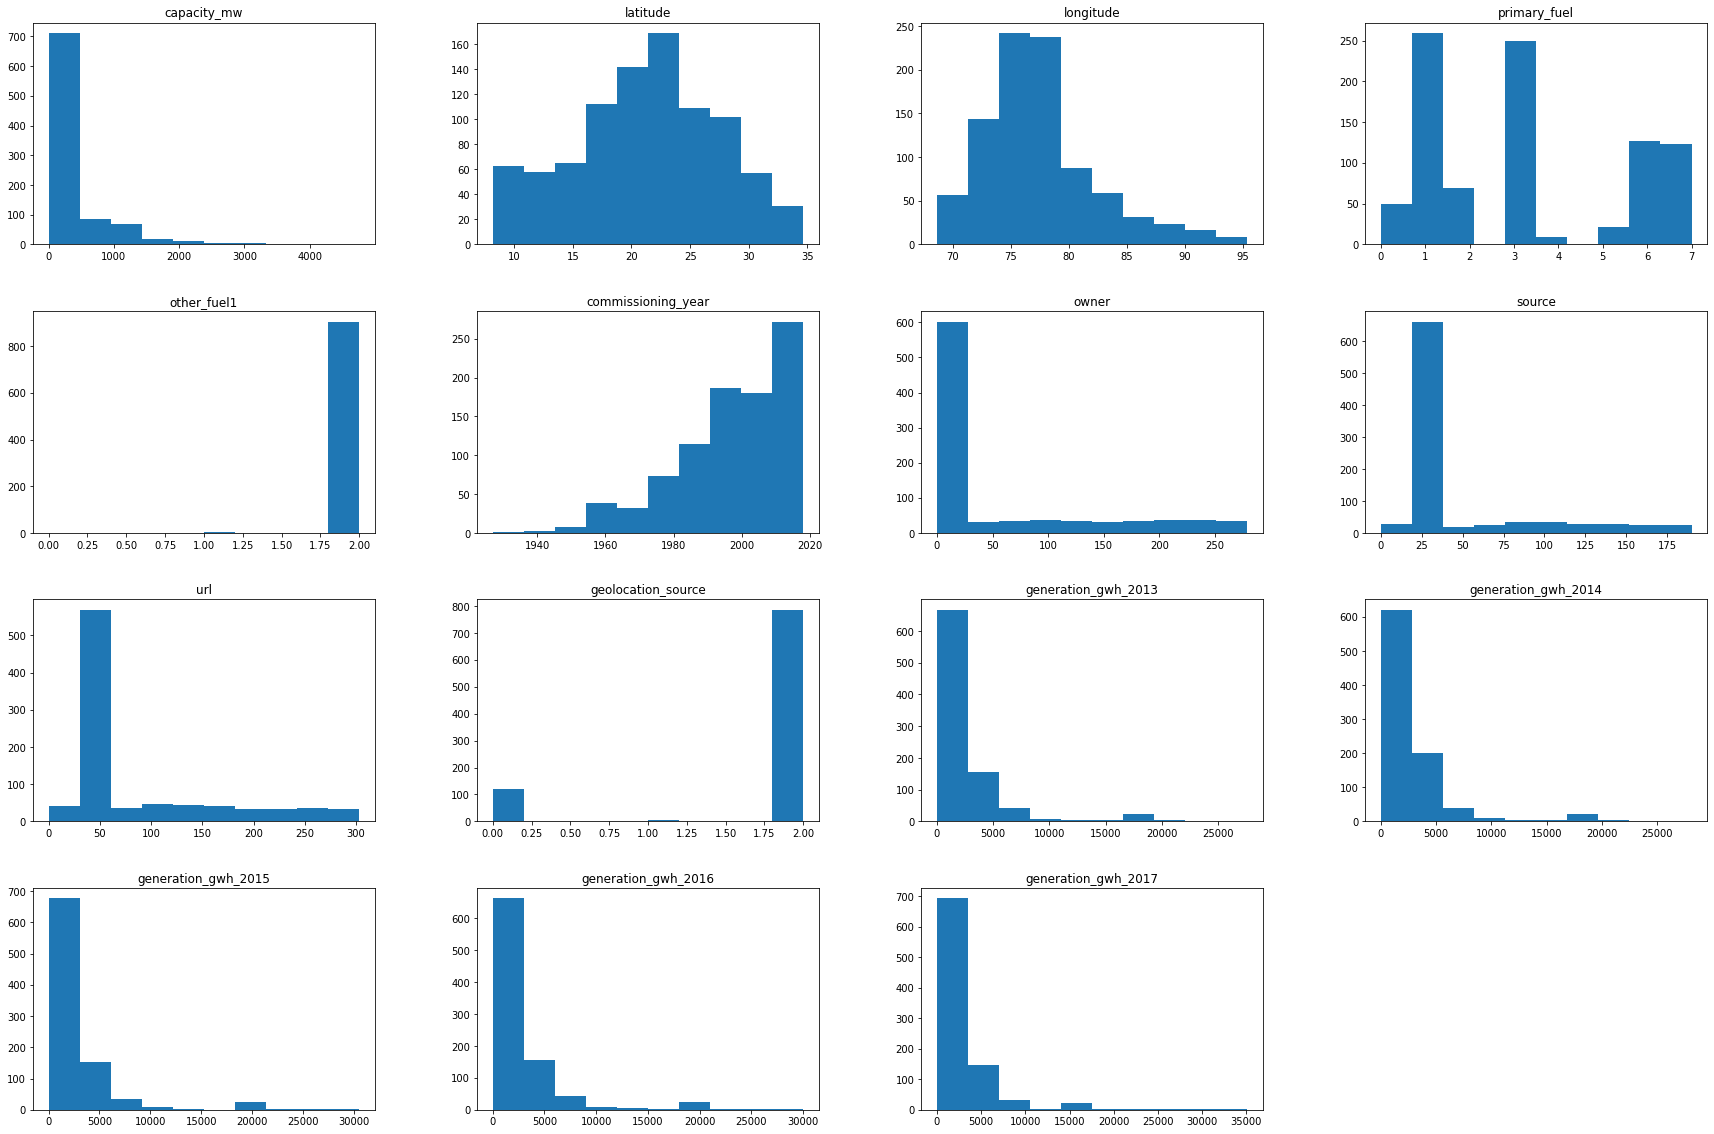

In [44]:
data.hist(figsize = (30,20), grid = False)

The data is now less skewed

**Model with Target Variable: primary_fuel**

In [47]:
y1 = data['primary_fuel']
x1 = data.drop(['primary_fuel'],axis = 1)

Splitting the data

In [48]:
#Handling class imbalance problem by oversampling the minority classes.

from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_over, y_over = SM.fit_resample(x1,y1)

Dealing with the problem of class imbalance

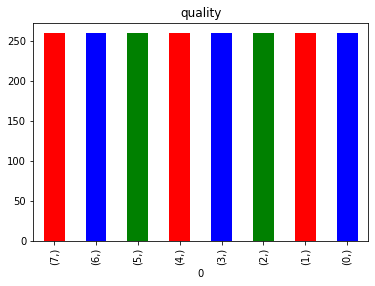

In [49]:
pd.DataFrame(y_over).value_counts().plot(kind='bar', title='quality', color=['r','b','g'])

Now, the classes are equal

In [51]:
ydata = pd.Series(y_over)
ydata.head()

0    6
1    1
2    7
3    2
4    1
dtype: int64

Converted the data in the series

In [52]:
xdata = pd.DataFrame(X_over)
xdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.5,28.1839,73.2407,2.0,2011.000000,229.0,109.0,128.0,1.0,573.288667,576.547333,482.349333,551.226333,529.008000
1,98.0,24.7663,74.6090,2.0,1967.000000,258.0,174.0,173.0,2.0,3040.819933,2531.734217,298.881417,265.260367,241.997267
2,39.2,21.9038,69.3732,2.0,2009.333333,2.0,21.0,205.0,2.0,1941.346333,2420.079333,1942.164800,2280.040517,1644.988333
3,135.0,23.8712,91.3602,2.0,2004.000000,5.0,22.0,58.0,2.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,2.0,2015.000000,5.0,22.0,58.0,2.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


Converted the x data into dataframe

In [56]:

xdata.columns =['capacity_mw', 'latitude', 'longitude', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017']
xdata.head()

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,2.0,2011.000000,229.0,109.0,128.0,1.0,573.288667,576.547333,482.349333,551.226333,529.008000
1,98.0,24.7663,74.6090,2.0,1967.000000,258.0,174.0,173.0,2.0,3040.819933,2531.734217,298.881417,265.260367,241.997267
2,39.2,21.9038,69.3732,2.0,2009.333333,2.0,21.0,205.0,2.0,1941.346333,2420.079333,1942.164800,2280.040517,1644.988333
3,135.0,23.8712,91.3602,2.0,2004.000000,5.0,22.0,58.0,2.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,2.0,2015.000000,5.0,22.0,58.0,2.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


Renamed the columns name

In [57]:
xdata.skew()

capacity_mw             2.918667
latitude                0.060847
longitude               1.539153
other_fuel1           -10.162206
commissioning_year     -0.828710
owner                   1.030039
source                  1.376039
url                     1.360360
geolocation_source     -2.344130
generation_gwh_2013     3.569630
generation_gwh_2014     3.533637
generation_gwh_2015     3.754921
generation_gwh_2016     3.558627
generation_gwh_2017     3.370470
dtype: float64

The skewness is still very high

In [58]:
xdata.drop(columns = ['other_fuel1'], axis = 1, inplace = True)

Dropped other_fuel1

In [62]:
#Applying z score
from scipy.stats import zscore

z = np.abs(zscore(xdata))

df = xdata[(z<3).all(axis = 1)]


Applied z score to deal with outliers

In [63]:
print("shape before and after")
print("shape before".ljust(20),":", xdata.shape)
print("shape after".ljust(20),":", df.shape)
print("Percentage Loss".ljust(20),":", (xdata.shape[0]-df.shape[0])/xdata.shape[0])

shape before and after
shape before         : (2072, 13)
shape after          : (1924, 13)
Percentage Loss      : 0.07142857142857142


We are losing only 7% data which is acceptable

In [86]:
d =  []
s = range(0,1931)
index = df.index

for i in s:
  if i in index:
    continue
  else:
    d.append(i)

Created a list of deleted rows

In [89]:
target = ydata.drop(index = d)
t = pd.Series(data = target, index = range(0,2065))
ta =t.dropna(axis = 0)
ta.head()

0    6.0
1    1.0
2    7.0
4    1.0
5    1.0
dtype: float64

Deleted the rows depending on the deleted x data

In [64]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

importing the libraries

In [65]:
#applying standard scaler:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

Applied standard scaler

In [66]:
x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = df.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,capacity_mw,2.010192
1,latitude,1.223368
2,longitude,1.232558
3,commissioning_year,1.292142
4,owner,3.990743
5,source,3.351006
6,url,1.451660
7,geolocation_source,1.478168
8,generation_gwh_2013,11.686130
9,generation_gwh_2014,21.426760


VIF is greater than 10 for some features.

In [67]:
df.drop(['generation_gwh_2016'], axis =1, inplace = True)

Dropped the feature with highest VIF

In [69]:
#again applying standard scaler:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

Again applied standard scaler

In [70]:
x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = df.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,capacity_mw,1.987259
1,latitude,1.220402
2,longitude,1.232486
3,commissioning_year,1.290224
4,owner,3.986438
5,source,3.349719
6,url,1.435636
7,geolocation_source,1.477900
8,generation_gwh_2013,11.506872
9,generation_gwh_2014,20.508302


VIF is still greater than 10 for some features

In [71]:
df.drop(['generation_gwh_2014'], axis =1, inplace = True)

Dropped the feature with the highest VIF

In [72]:
#again applying standard scaler:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

Applied the standard scaler again

In [73]:
x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = df.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,capacity_mw,1.977965
1,latitude,1.220147
2,longitude,1.189353
3,commissioning_year,1.281804
4,owner,3.981712
5,source,3.346439
6,url,1.435623
7,geolocation_source,1.445440
8,generation_gwh_2013,5.788347
9,generation_gwh_2015,10.189538


Now, VIF is less than 10 for all the features

In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    df, ta, test_size=0.2, random_state=62)
models = [KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier']

acc = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc.append(accuracy_score(pred, y_test))

models = {'Modelling Algorithm': model_names, 'Accuracy': acc}
models_df = pd.DataFrame(models)
models_df

,Modelling Algorithm,Accuracy
0,KNearestNeighbors,0.735065
1,RandomForestClassifier,0.937662
2,DecisionTree,0.896104
3,GradientBoostingClassifier,0.919481


Trained the data

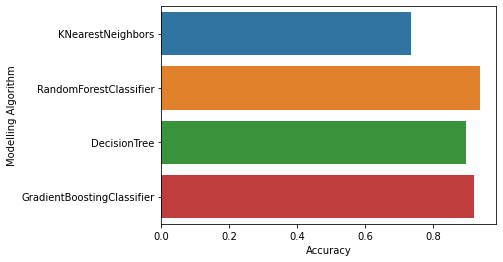

In [157]:
sns.barplot(y='Modelling Algorithm', x='Accuracy', data=models_df)

Visual representation of accuracy scores of different models

In [158]:
#Now, let's apply cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    df, ta, test_size=0.2, random_state=62)
models = [KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, df, ta, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

,Modelling Algorithm,CV SCORE
0,KNearestNeighbors,0.733366
1,RandomForestClassifier,0.923072
2,DecisionTree,0.862261
3,GradientBoostingClassifier,0.903846


Applied cross validation

In [159]:
#Comparing CV Score and the Accuracy score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['ACCURACY'] = acc
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [acc[0] - CV_S[0], acc[1] - CV_S[1], acc[2] - CV_S[2], acc[3] - CV_S[3]]
Comparison

,Modelling Algorithm,ACCURACY,CV SCORE,Difference
0,KNearestNeighbors,0.735065,0.733366,0.001699
1,RandomForestClassifier,0.937662,0.923072,0.014590
2,DecisionTree,0.896104,0.862261,0.033843
3,GradientBoostingClassifier,0.919481,0.903846,0.015634


The least difference is in KNearestNeighbors.

In [99]:
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
dtc = DecisionTreeClassifier()
gb = GradientBoostingClassifier()

Initiated the models

In [102]:
#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.7422037422037422
Classification report:
               precision    recall  f1-score   support

         0.0       0.75      0.90      0.82        58
         1.0       0.42      0.29      0.35        58
         2.0       0.62      0.83      0.71        52
         3.0       0.77      0.39      0.52        59
         4.0       0.75      0.88      0.81        67
         5.0       0.84      0.97      0.90        68
         6.0       0.74      0.75      0.75        57
         7.0       0.95      0.87      0.91        62

    accuracy                           0.74       481
   macro avg       0.73      0.74      0.72       481
weighted avg       0.74      0.74      0.73       481



Classification report of knn

In [104]:

#Train the model using the training sets
rf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.918918918918919
Classification report:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        58
         1.0       0.83      0.67      0.74        58
         2.0       0.85      0.85      0.85        52
         3.0       0.86      0.86      0.86        59
         4.0       0.90      0.97      0.94        67
         5.0       0.93      0.97      0.95        68
         6.0       1.00      1.00      1.00        57
         7.0       1.00      1.00      1.00        62

    accuracy                           0.92       481
   macro avg       0.92      0.92      0.91       481
weighted avg       0.92      0.92      0.92       481



Classification report of rf

In [105]:

#Train the model using the training sets
dtc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = dtc.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.8731808731808732
Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        58
         1.0       0.71      0.64      0.67        58
         2.0       0.71      0.79      0.75        52
         3.0       0.79      0.76      0.78        59
         4.0       0.85      0.96      0.90        67
         5.0       0.95      0.87      0.91        68
         6.0       1.00      1.00      1.00        57
         7.0       0.97      1.00      0.98        62

    accuracy                           0.87       481
   macro avg       0.87      0.87      0.87       481
weighted avg       0.87      0.87      0.87       481



Classification report of dtc

In [106]:
#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.9251559251559252
Classification report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        58
         1.0       0.89      0.71      0.79        58
         2.0       0.81      0.83      0.82        52
         3.0       0.91      0.90      0.91        59
         4.0       0.87      1.00      0.93        67
         5.0       0.94      0.94      0.94        68
         6.0       1.00      1.00      1.00        57
         7.0       1.00      1.00      1.00        62

    accuracy                           0.93       481
   macro avg       0.92      0.92      0.92       481
weighted avg       0.93      0.93      0.92       481



Classification report of gb

In [160]:
#HYPERPARAMETER TUNING:

grid_param = {
    'n_neighbors' : range(2,8,2),
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : range(20,40,5)
}

Applied hyperparameter tuning

In [161]:
grid = GridSearchCV(knn, param_grid = grid_param)

Applied grid search CV

In [162]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(20, 40, 5),
                         'n_neighbors': range(2, 8, 2),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Trained the model

In [163]:
best_parameters = grid.best_params_
print(best_parameters)

{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 2, 'weights': 'distance'}


Received the best parameters

In [164]:
#FINAL MODEL
#Substituting the best parameters in the KNeighborsClassifier:

KNN = KNeighborsClassifier(algorithm = 'auto', leaf_size = 20, n_neighbors = 2, weights = 'distance')

KNN.fit(X_train, y_train)
KNN.score(X_test,y_test)

0.8571428571428571

The final score is 85.71%

In [165]:
#SAVING THE MODEL:

import joblib
joblib.dump(KNN, 'Power_plant_classifier.pkl')

['Power_plant_classifier.pkl']

Saved the model

**Model with Target Variable: capacity_mw**

In [111]:
y2 = data['capacity_mw']
x2 = data.drop(['capacity_mw'],axis = 1)

Splitted the data

In [122]:
#Model Building

x_train, x_test, Y_train, Y_test = train_test_split(x2, y2, test_size = 0.3, random_state = 8)

models = [LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(n_neighbors = 5), GradientBoostingRegressor()]

model_names = ['LR', 'RF', 'KNN', 'GB']

r2 = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train, Y_train)
    pred = clf.predict(x_test)
    r2.append(r2_score(Y_test,pred))

models = {'Modelling Algoritm' : model_names, 'r2 score' : r2}

models_df = pd.DataFrame(models)
models_df

,Modelling Algoritm,r2 score
0,LR,0.551658
1,RF,0.843940
2,KNN,0.462990
3,GB,0.845769


Trained the models

In [123]:
#Cross Validation

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

x_train, x_test, Y_train, Y_test = train_test_split(x2, y2, test_size = 0.25, random_state = 8)

models = [LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(n_neighbors = 5), GradientBoostingRegressor()]

model_names = ['LR', 'RF', 'KNN', 'GB']

k_f = KFold(n_splits=4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(x_train, Y_train)
    pred = clf.predict(x_test)
    CV_S.append(cross_val_score(c, x2, y2, cv = 5).mean())

CV = {'MODELLING ALGORITHM': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df


,MODELLING ALGORITHM,CV SCORE
0,LR,0.501342
1,RF,0.814934
2,KNN,0.511193
3,GB,0.775118


Applied cross validation

In [124]:
#Comparing CV Score and the r2 score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['r2 score'] = r2
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [r2[0] - CV_S[0], r2[1] - CV_S[1], r2[2] - CV_S[2], r2[3] - CV_S[3]]
Comparison

,Modelling Algorithm,r2 score,CV SCORE,Difference
0,LR,0.551658,0.501342,0.050317
1,RF,0.843940,0.814934,0.029006
2,KNN,0.462990,0.511193,-0.048203
3,GB,0.845769,0.775118,0.070652


The difference is least in random forest regressor

In [126]:
#HYPERPARAMETER TUNING

from sklearn.model_selection import GridSearchCV

grid_param = {
    'n_estimators' : [100,130,160],
    'criterion' : ('mse', 'mae'),
    'max_depth' : [2,4,6,8],
    'min_samples_split' : range(1,5)
}

Applied hyperparameter tuning

In [129]:
grid = GridSearchCV(RandomForestRegressor(), param_grid = grid_param)

Applied grid search CV

In [130]:
grid.fit(x_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

Trained the model

In [131]:
best_parameters = grid.best_params_
print(best_parameters)

{'criterion': 'mae', 'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 160}


Received best parameters

In [133]:
#FINAL MODEL
#Substituting the best parameters in the RandomForestRegressor:

rf =  RandomForestRegressor(criterion = 'mae', max_depth = 8, min_samples_split = 2, n_estimators = 160)

rf.fit(x_train, Y_train)
pred = rf.predict(x_test)
rscore = r2_score(Y_test, pred)
rscore

0.862366462099363

Received the r2 score as 86.23%

In [134]:
#SAVING THE MODEL:

import joblib
joblib.dump(rf, 'power_plant_regression.pkl')

['power_plant_regression.pkl']

Saved the model